In [147]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [148]:
df_team = pd.read_csv('LCK_team_stats.csv')
df_player = pd.read_csv('LCK_player_stats.csv')
df_role = pd.read_csv('LCK_player_role.csv')

In [149]:
df_team['Win rate'] = df_team['Win rate'].str.replace('%', '').astype(float) / 100

df_player['Win Rate:'] = df_player['Win Rate:'].str.replace('%', '').astype(float) / 100
df_player['Kill Participation:'] = df_player['Kill Participation:'].str.replace('%', '').astype(float) / 100

### Analyse team data

In [150]:
clean_team_data = df_team.select_dtypes(include='number').drop(columns=['Year', 'Games'])

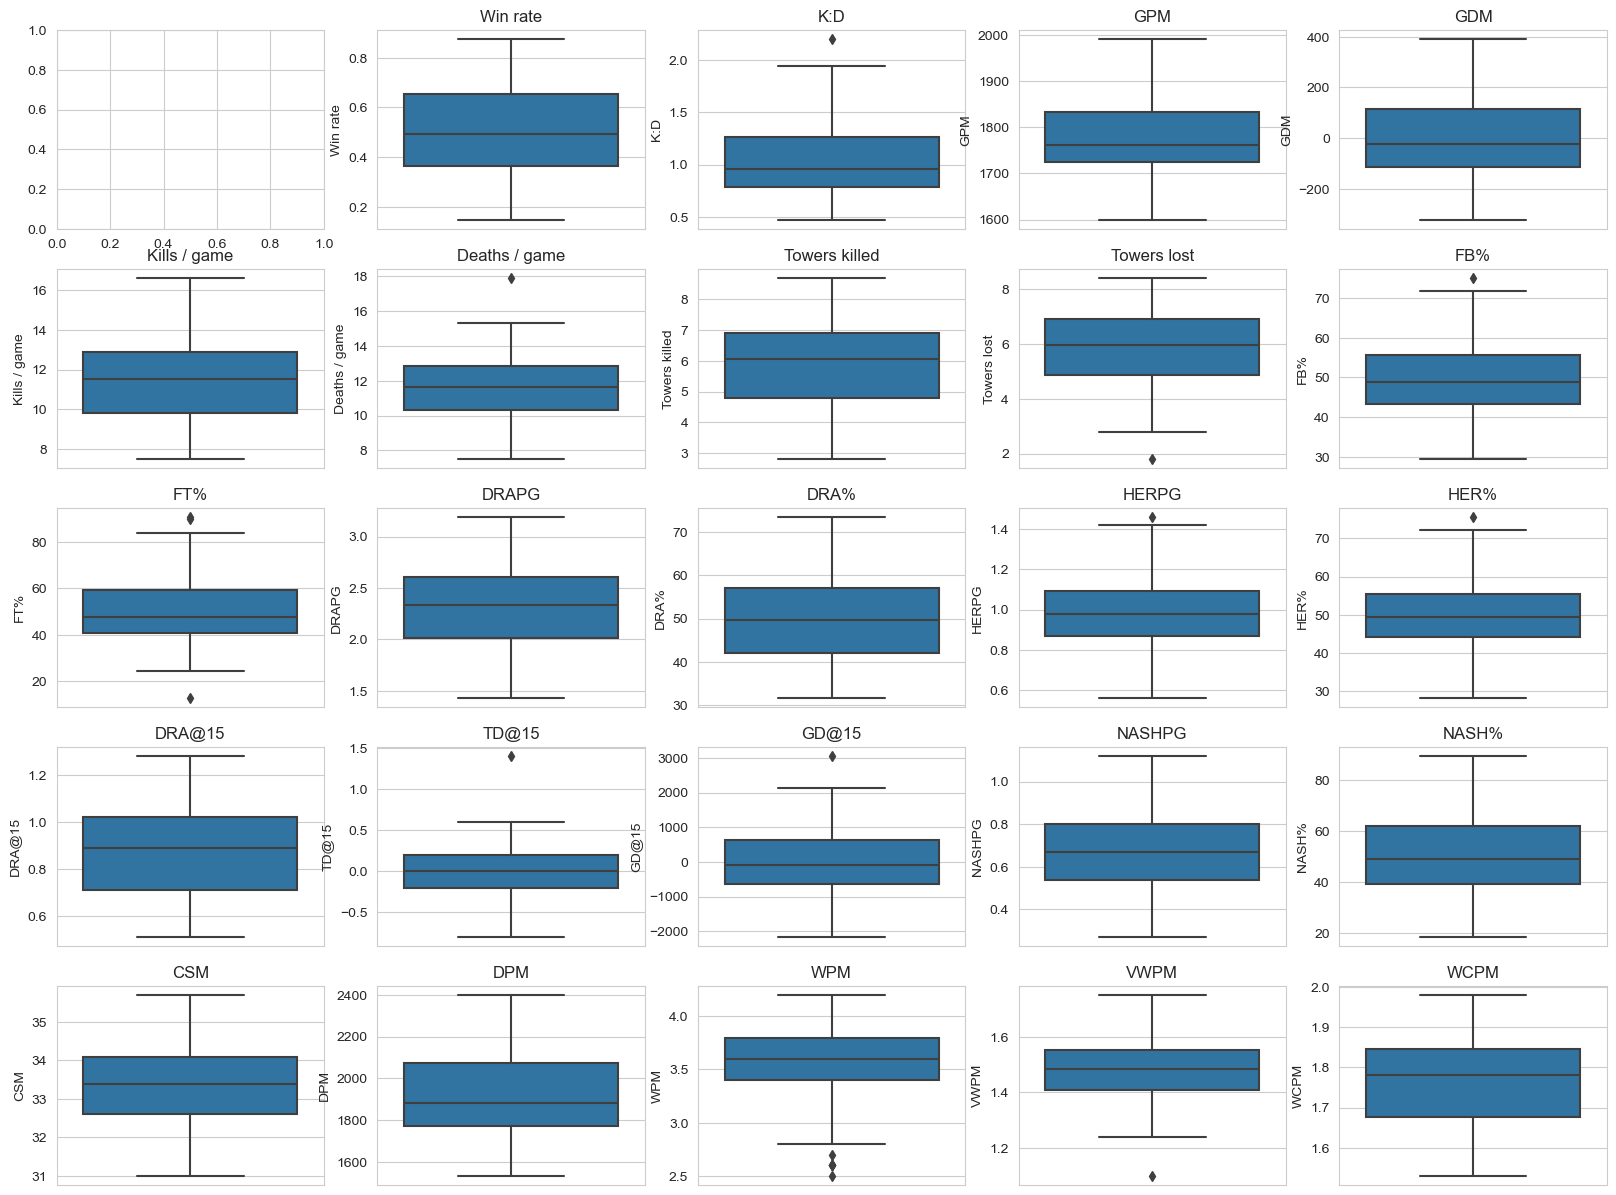

In [152]:
cols = clean_team_data.columns

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))


sns.boxplot(y=clean_team_data.iloc[:, 0], ax=axes[0, 1])
axes[0, 1].set_title(cols[0])

sns.boxplot(y=clean_team_data.iloc[:, 1], ax=axes[0, 2])
axes[0, 2].set_title(cols[1])

sns.boxplot(y=clean_team_data.iloc[:, 2], ax=axes[0, 3])
axes[0, 3].set_title(cols[2])

sns.boxplot(y=clean_team_data.iloc[:, 3], ax=axes[0, 4])
axes[0, 4].set_title(cols[3])

x, y = 1, 0
for i in range(4, 24):
    sns.boxplot(y=clean_team_data.iloc[:, i], ax=axes[x, y])
    axes[x, y].set_title(cols[i])
    
    y += 1
    
    if y != 0 and y % 5 == 0:
        y = 0
        x += 1
    
    
plt.show()

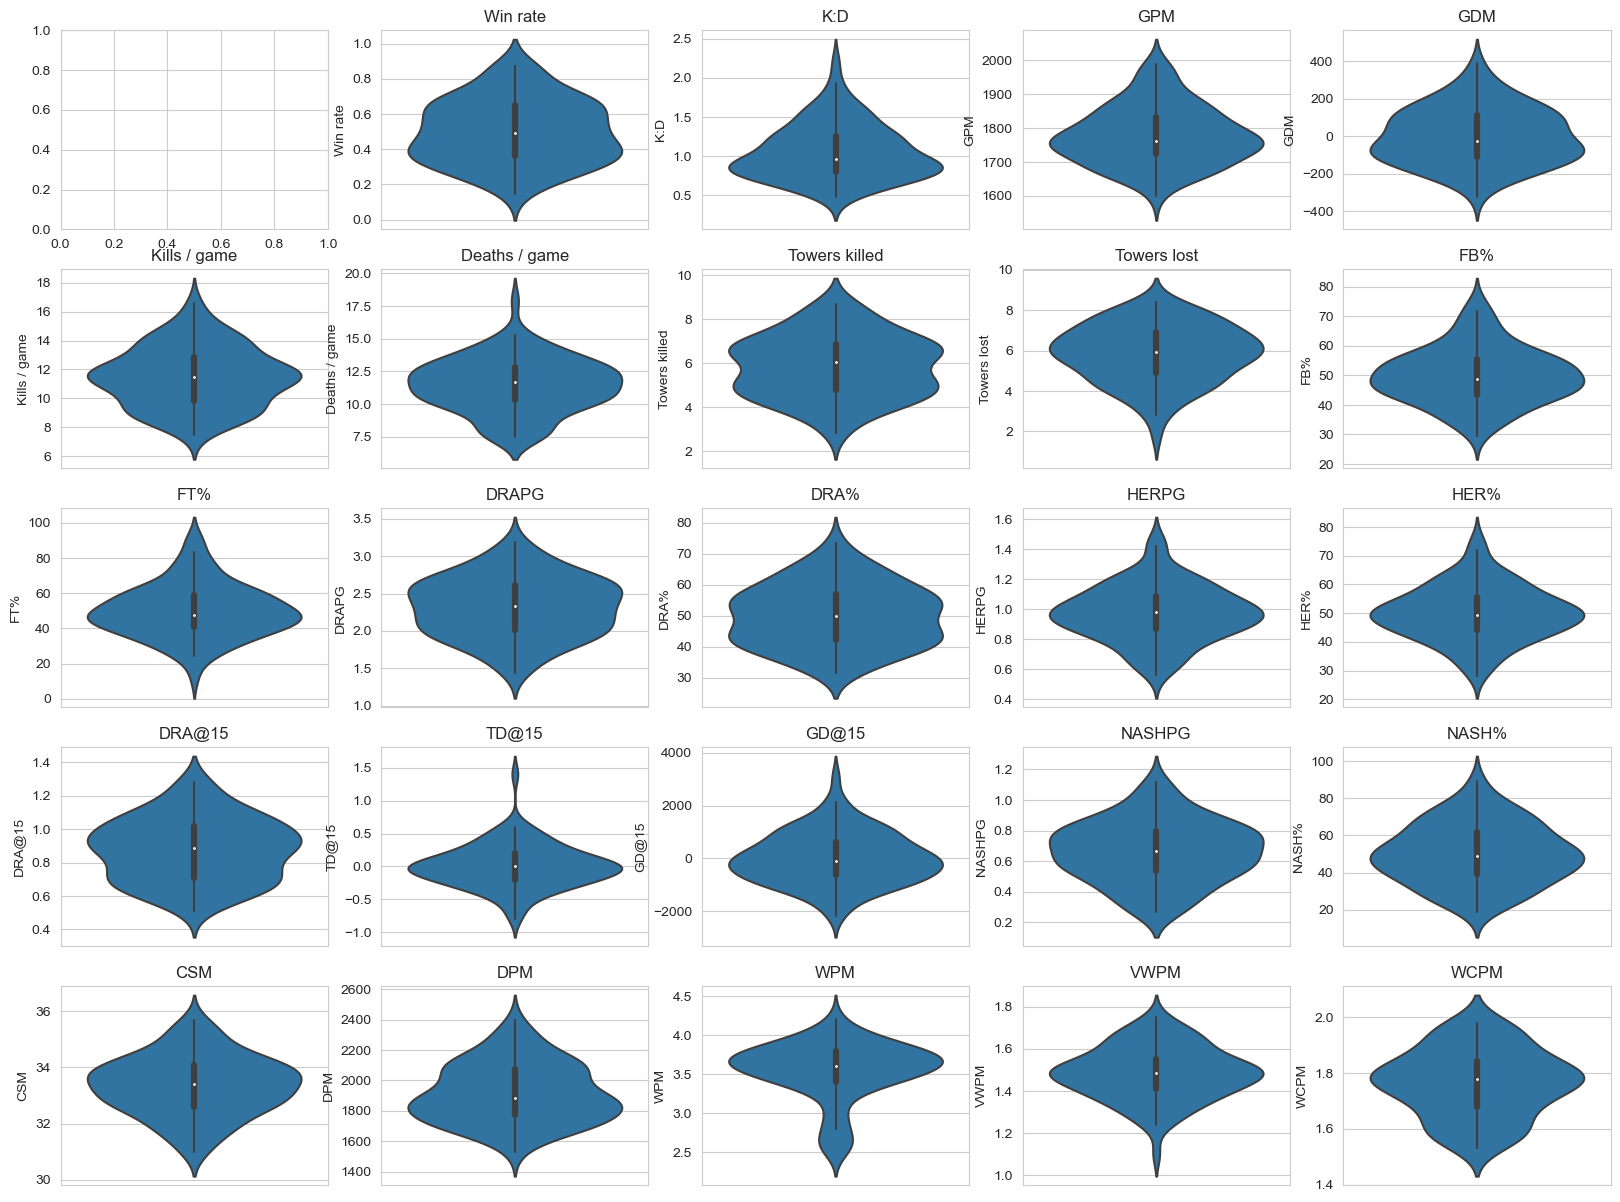

In [169]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))

sns.violinplot(y=clean_team_data.iloc[:, 0], ax=axes[0, 1])
axes[0, 1].set_title(cols[0])

sns.violinplot(y=clean_team_data.iloc[:, 1], ax=axes[0, 2])
axes[0, 2].set_title(cols[1])

sns.violinplot(y=clean_team_data.iloc[:, 2], ax=axes[0, 3])
axes[0, 3].set_title(cols[2])

sns.violinplot(y=clean_team_data.iloc[:, 3], ax=axes[0, 4])
axes[0, 4].set_title(cols[3])

x, y = 1, 0
for i in range(4, 24):
    sns.violinplot(y=clean_team_data.iloc[:, i], ax=axes[x, y])
    axes[x, y].set_title(cols[i])
    
    y += 1
    
    if y != 0 and y % 5 == 0:
        y = 0
        x += 1
    
    
plt.show()

In [154]:
scaler = preprocessing.StandardScaler()
norm_team_data = pd.DataFrame(scaler.fit_transform(clean_team_data), columns=clean_team_data.columns)

corr = norm_team_data.corr()


<Axes: >

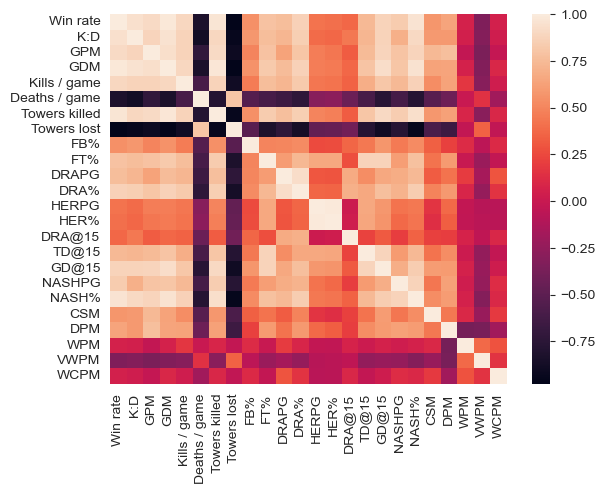

In [155]:
sns.heatmap(corr)

#### PCA

In [156]:
pca = PCA()
pca.fit(norm_team_data)

PCA()

[1.45531419e+01 2.22732600e+00 1.74945830e+00 1.13266330e+00
 8.37193701e-01 7.61483682e-01 6.66617307e-01 6.49033708e-01
 4.98888207e-01 3.57227942e-01 2.28981656e-01 1.57950158e-01
 1.28649063e-01 1.01298961e-01 6.25015112e-02 5.19810034e-02
 4.17244481e-02 2.71485940e-02 2.44152202e-02 1.44847159e-02
 1.14420259e-02 1.02008184e-02 6.87060425e-03 3.11463049e-03]


D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

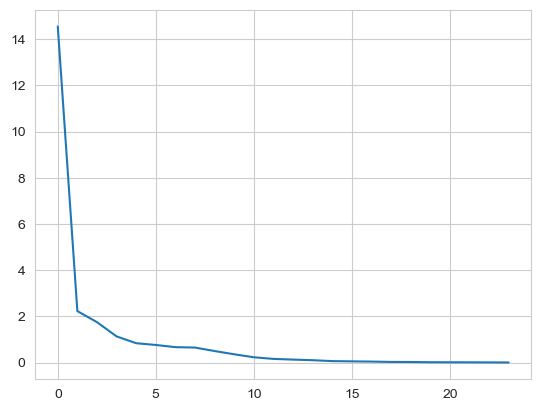

In [157]:
eigenvalue = pca.explained_variance_
print(eigenvalue)
sns.lineplot(eigenvalue)

In [158]:
ratio = pca.explained_variance_ratio_
print(ratio)

[5.98801152e-01 9.16451842e-02 7.19829198e-02 4.66043753e-02
 3.44470325e-02 3.13318807e-02 2.74285246e-02 2.67050328e-02
 2.05271710e-02 1.46984413e-02 9.42164106e-03 6.49899087e-03
 5.29337290e-03 4.16803015e-03 2.57167676e-03 2.13880170e-03
 1.71678719e-03 1.11705152e-03 1.00458458e-03 5.95985706e-04
 4.70791689e-04 4.19721173e-04 2.82696737e-04 1.28154067e-04]


In [159]:
cumulated_ratio = np.array([ratio[:i+1].sum() for i, col in enumerate(norm_team_data.columns)])

D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


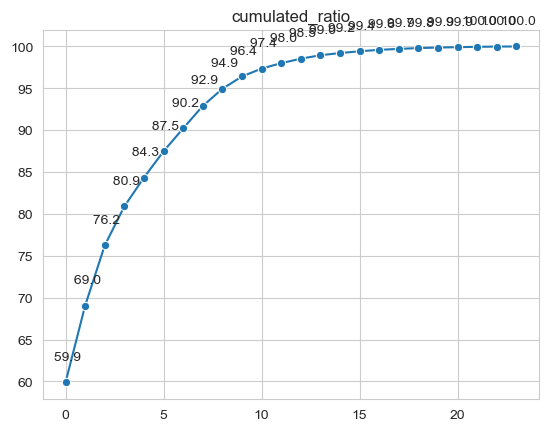

In [160]:
sns.lineplot(cumulated_ratio * 100, markers=True, marker="o")
for i, j in enumerate(cumulated_ratio * 100):
    plt.annotate("{0: .1f}".format(j), (i, j + 1), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.title("cumulated_ratio")
plt.show()

According to the cumulated ratio, we take n_components = 10

In [161]:
pca3 = PCA(n_components=3)
pca_team_array = pca3.fit_transform(norm_team_data)

In [162]:
print(pca3.explained_variance_ratio_)

[0.59880115 0.09164518 0.07198292]


In [163]:
indexs = ['I', 'II', "III"]
pca_team_data = {}
for i, index in enumerate(indexs):
    pca_team_data[index] = pca_team_array[:, i]

df_pca_team = pd.DataFrame(pca_team_data)

D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\envs\master\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


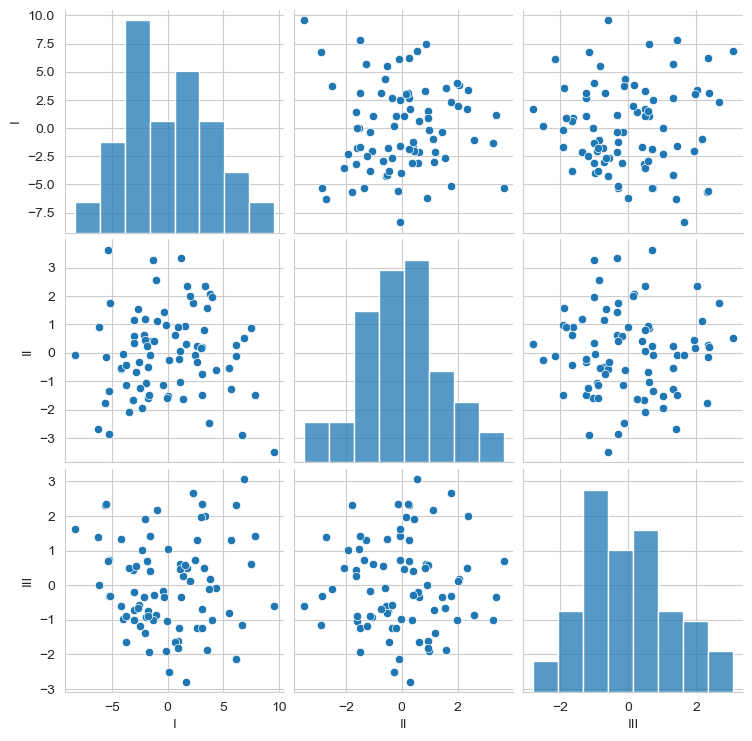

In [164]:
sns.pairplot(df_pca_team)

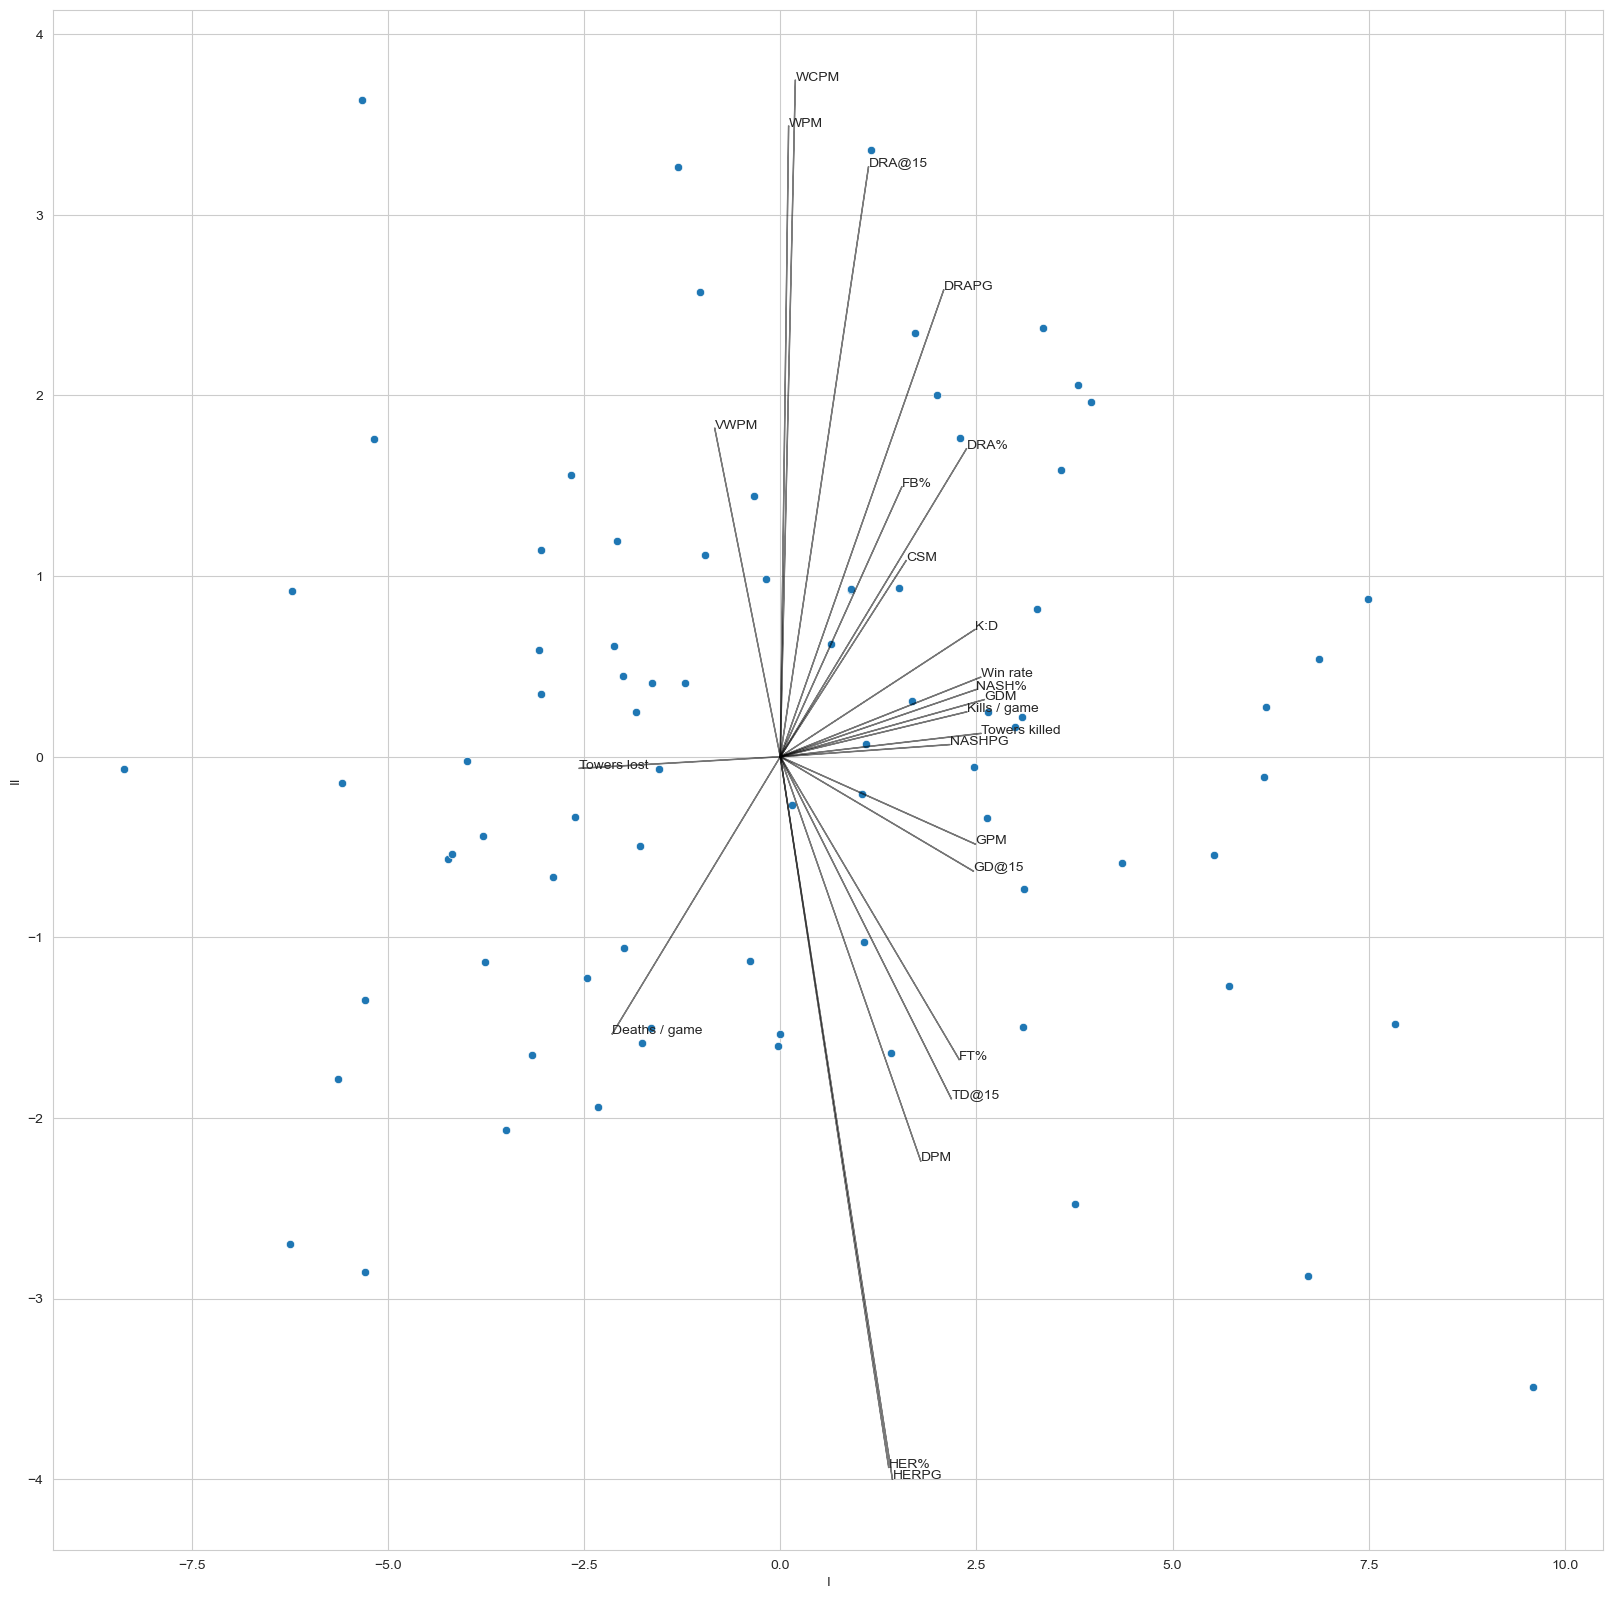

In [165]:
j = 0
plt.subplots(figsize=(20, 20))
sns.scatterplot(data=df_pca_team, x = indexs[j], y = indexs[j+1 % 3])
for i in range(pca3.components_.shape[1]):
    plt.arrow(0, 0, pca3.components_[j, i]*10, pca3.components_[j+1%3,  i]*10, alpha=0.5, color='black')
    plt.text(pca3.components_[j, i]*10, pca3.components_[j+1%3, i]*10, norm_team_data.columns[i])
    

composant I vs composant II
c'est le composant le plus significatif vs composant deuxième significative
on peut distinguer quelque facteurs qui sont plus proche que WIN rate

**NASH%, GDM > GPM, Kills / game, Towers killed, NASHPG, K:D, CSM, DRA% > DRAPG >> DRA@15, FB%**

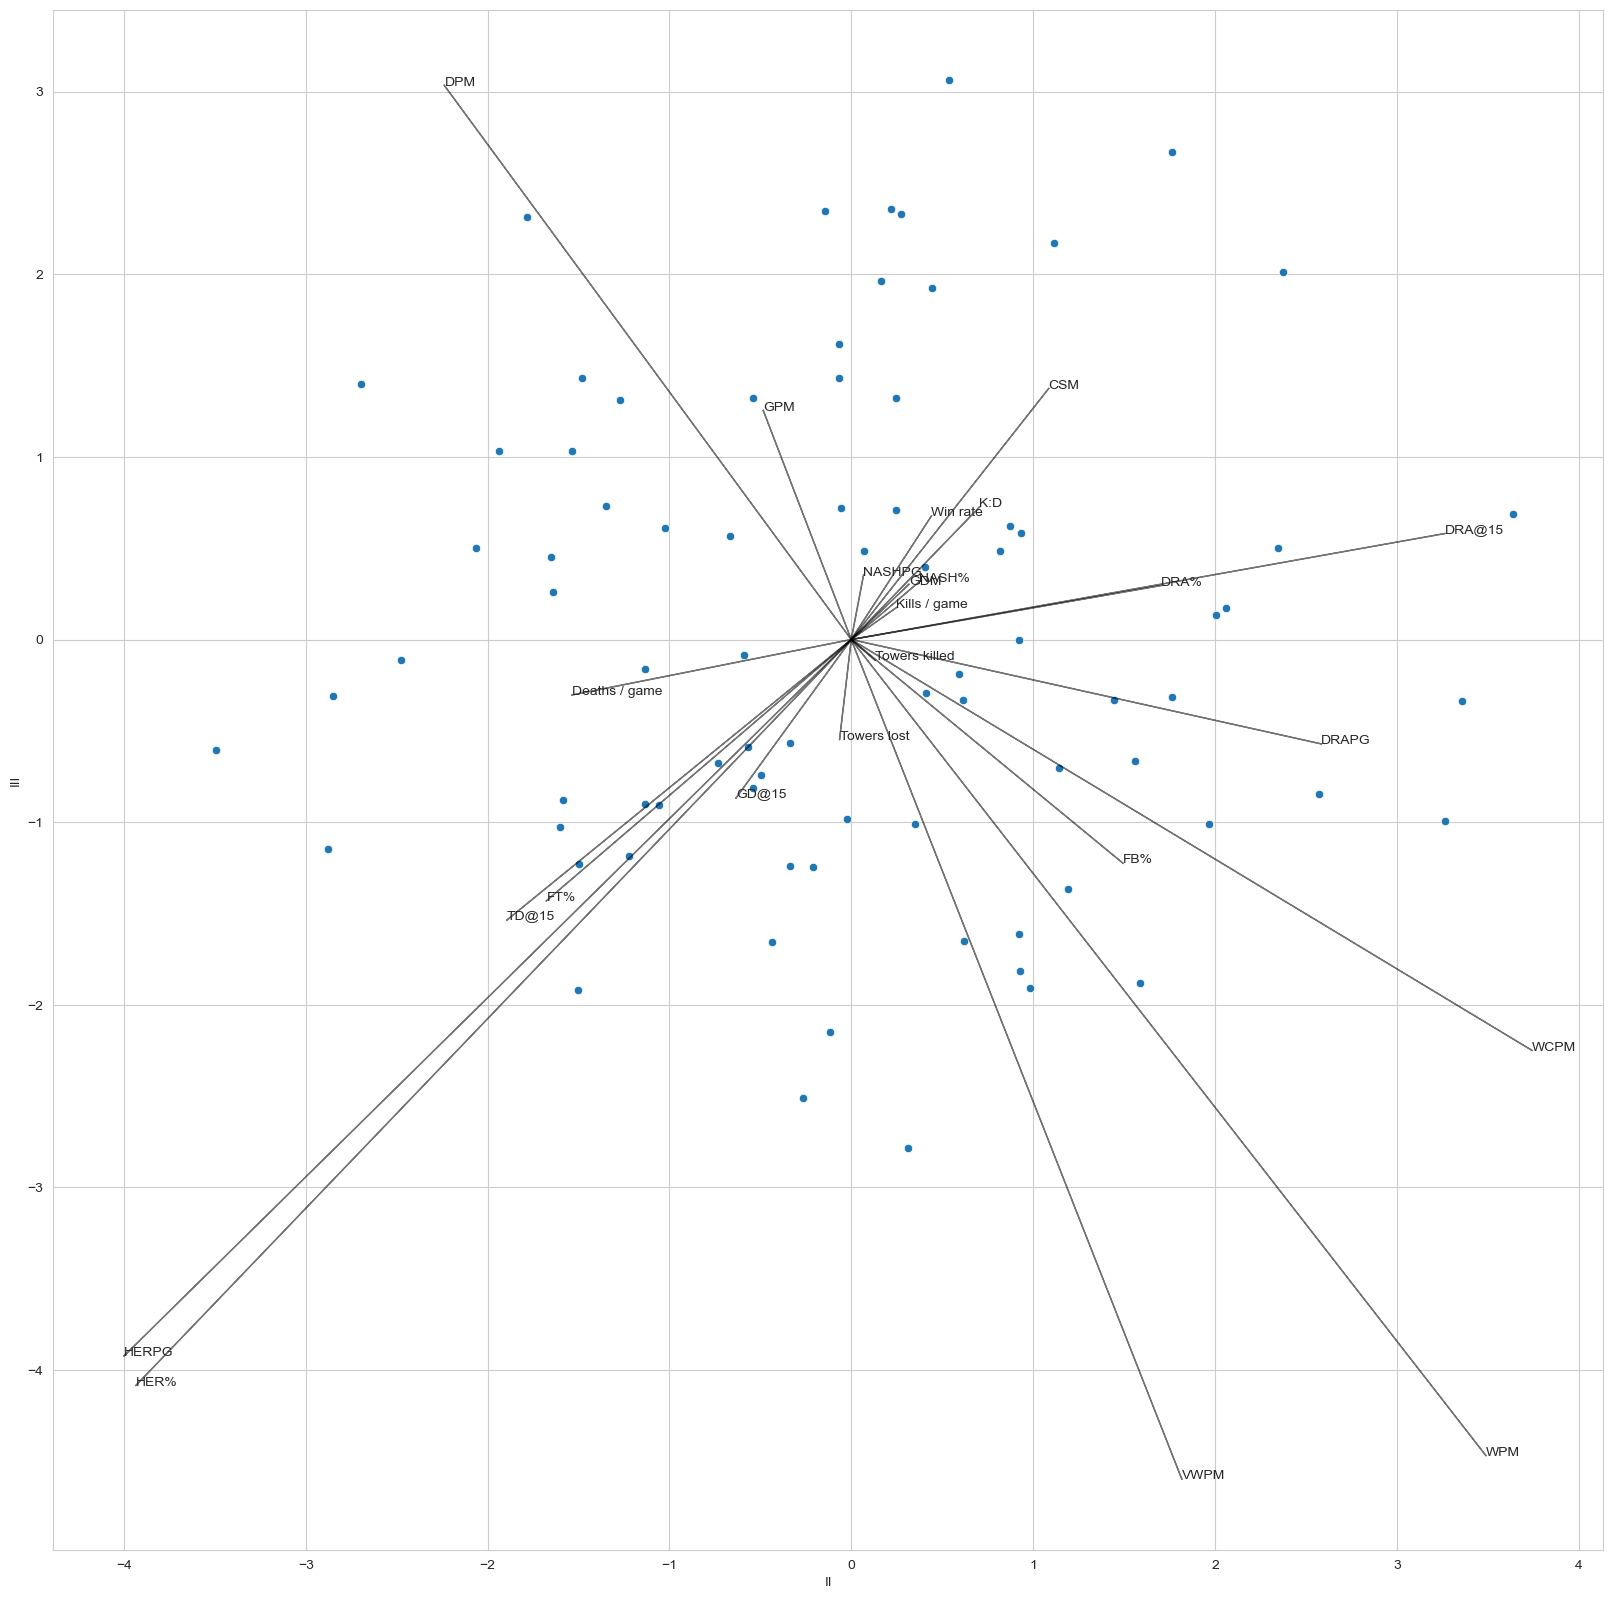

In [166]:
j = 1
plt.subplots(figsize=(20, 20))
sns.scatterplot(data=df_pca_team, x = indexs[j], y = indexs[j+1 % 3])
for i in range(pca3.components_.shape[1]):
    plt.arrow(0, 0, pca3.components_[j, i]*10, pca3.components_[j+1%3,  i]*10, alpha=0.5, color='black')
    plt.text(pca3.components_[j, i]*10, pca3.components_[j+1%3, i]*10, norm_team_data.columns[i])

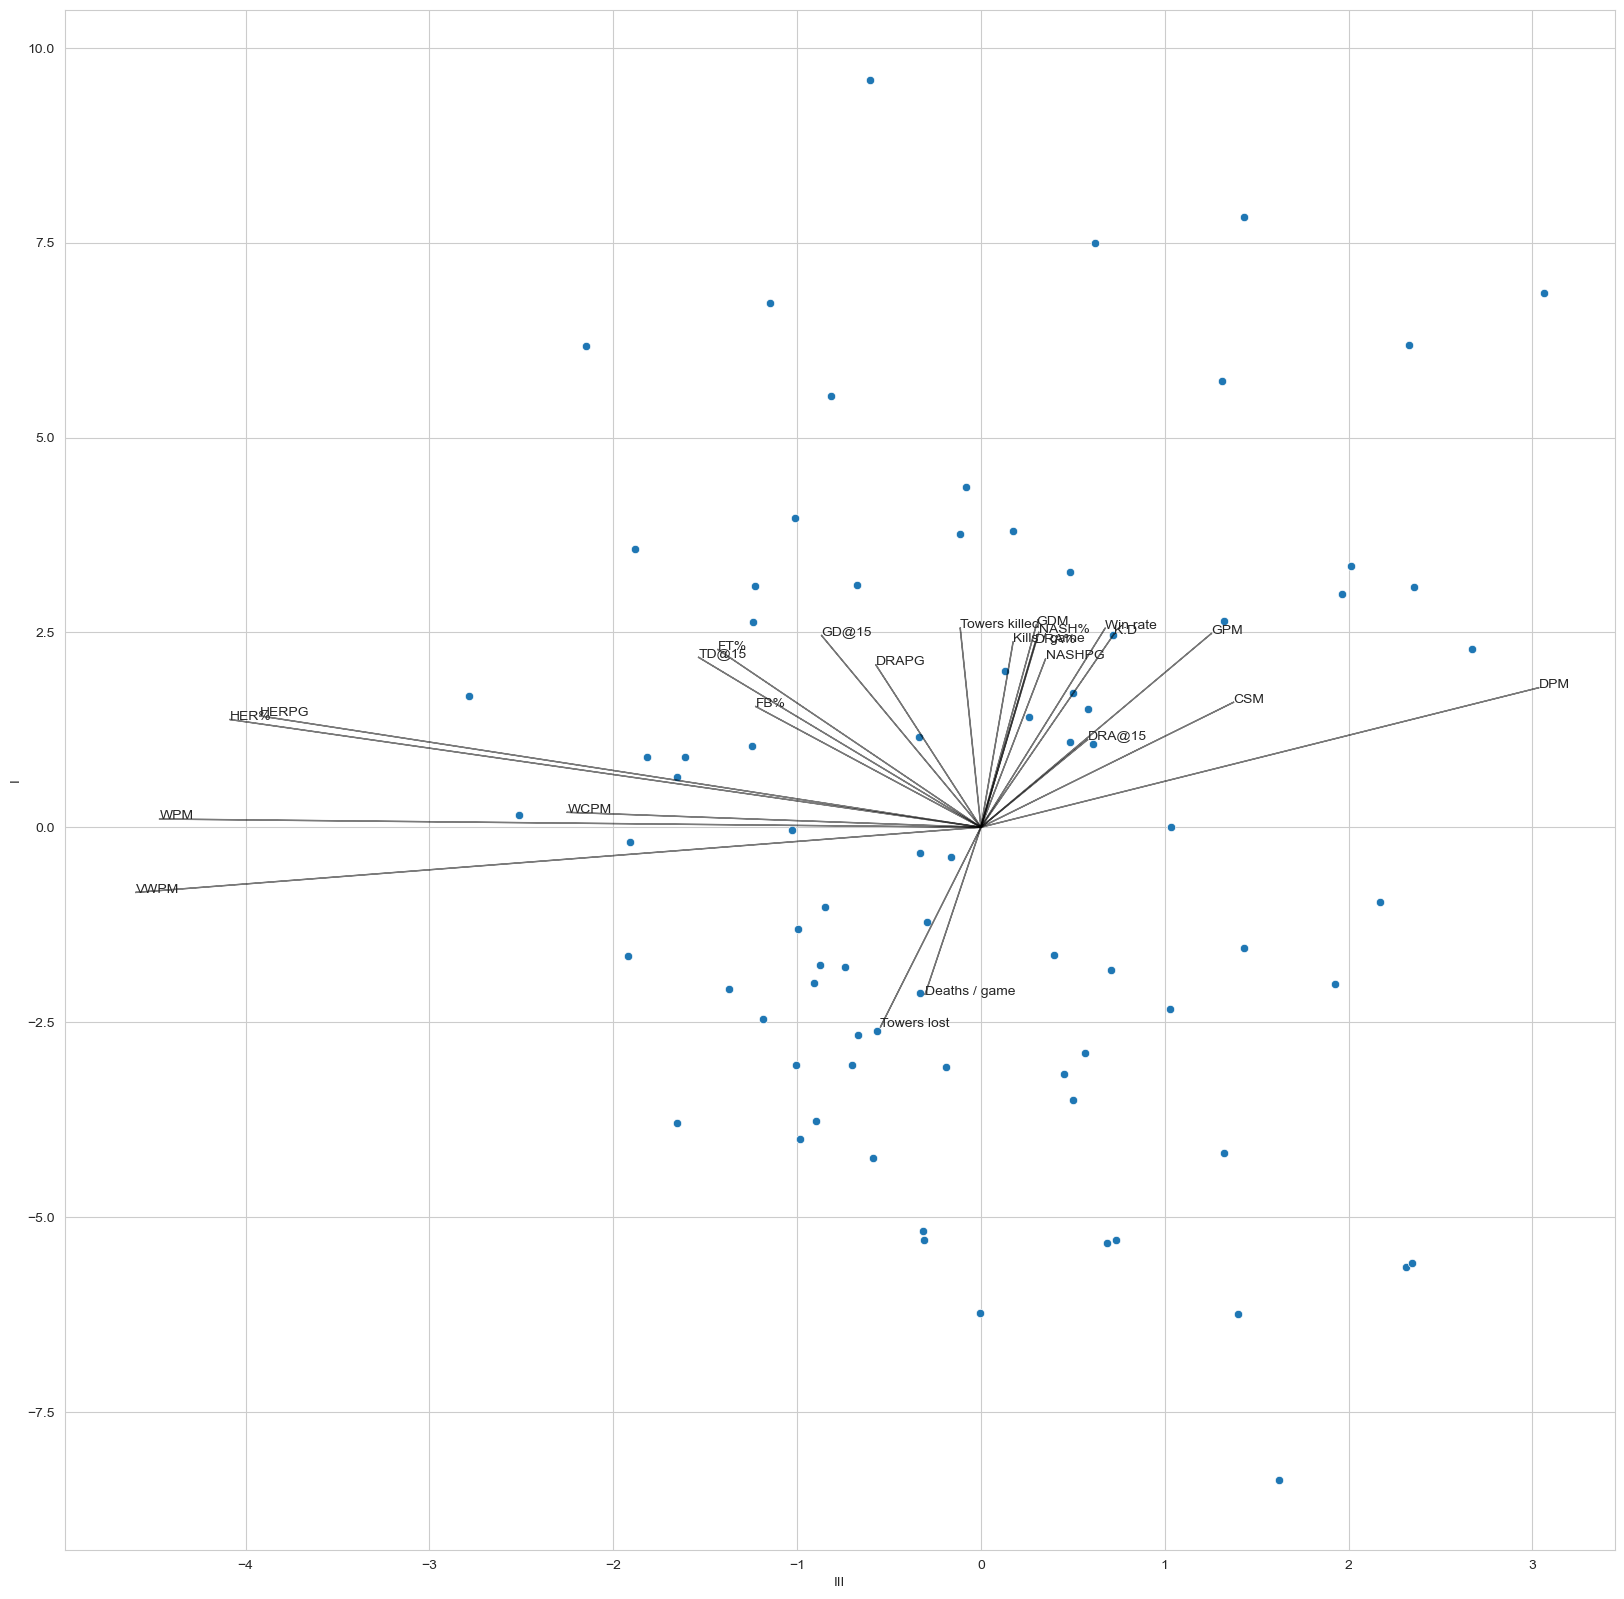

In [167]:
j = 2
plt.subplots(figsize=(20, 20))
sns.scatterplot(data=df_pca_team, x = indexs[j], y = indexs[(j+1) % 3])
for i in range(pca3.components_.shape[1]):
    plt.arrow(0, 0, pca3.components_[j, i]*10, pca3.components_[(j+1)%3,  i]*10, alpha=0.5, color='black')
    plt.text(pca3.components_[j, i]*10, pca3.components_[(j+1)%3, i]*10, norm_team_data.columns[i])

### Analyse Player


In [ ]:
clean_player_data = df_player.select_dtypes(include='number').drop(columns=['Year', 'Games'])
